# Simphony circuit simulator

[Simphony](https://simphonyphotonics.readthedocs.io/en/latest/) is a circuit simulator based on [scikit-rf](https://scikit-rf.readthedocs.io/en/latest/)

The main advantage of simphony over [SAX](https://flaport.github.io/sax/) is that simphony works in Windows, Linux and MacOs. While SAX only works on MacOs and Linux.

It also supports the SiEPIC PDK library natively.

## Component models

You can use component models from :

- Sparameters from Lumerical FDTD simulations thanks to the gdsfactory Lumerical plugin
- [SiPANN](https://sipann.readthedocs.io/en/latest/?badge=latest) open source package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gdsfactory as gf

import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc

2022-06-15 17:11:26.529 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.10.3


2022-06-15 17:11:27.939928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-15 17:11:27.939960: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_GAP/model


2022-06-15 17:11:29.889175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-15 17:11:29.889200: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-15 17:11:29.889218: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az39-254): /proc/driver/nvidia/version does not exist
2022-06-15 17:11:29.890058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-15 17:11:30.031204: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 opt

INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_STRAIGHT/model


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_BENT_RAND/model


In [2]:
c = gf.components.mzi()
n = c.get_netlist()

### Straight

Lets start with the Sparameter model of a straight waveguide.

The models are for lossless elements.

2022-06-15 17:11:30.948 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


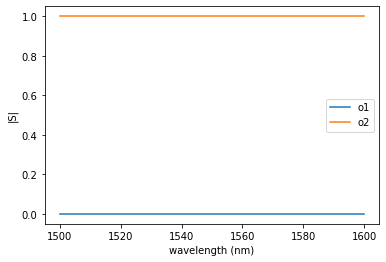

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [3]:
m = gc.straight()
wavelengths = np.linspace(1500, 1600, 128) * 1e-9
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

2022-06-15 17:11:31.070 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


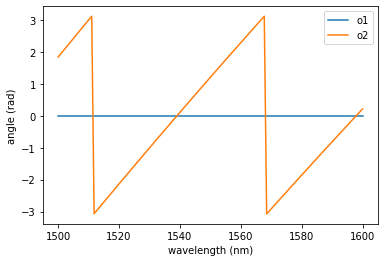

<AxesSubplot:xlabel='wavelength (nm)', ylabel='angle (rad)'>

In [4]:
m = gc.straight()
wavelengths = np.linspace(1500, 1600, 128) * 1e-9
gs.plot_model(m, phase=True, wavelengths=wavelengths)

### Bend

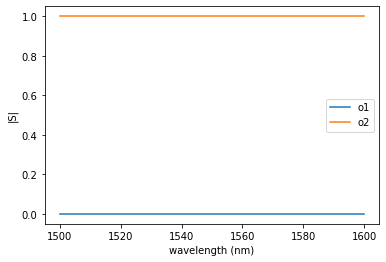

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [5]:
m = gc.bend_circular(radius=2)  # this bend should have some loss
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

2022-06-15 17:11:31.281 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


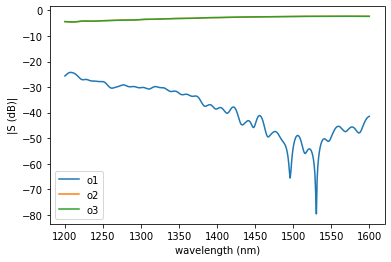

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [6]:
m = gc.mmi1x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m, pin_in="o1")

2022-06-15 17:11:31.426 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


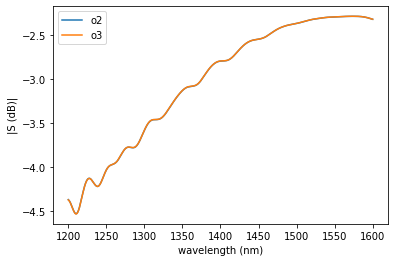

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [7]:
m = gc.mmi1x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m, pin_in="o1", pins=['o2', 'o3'])

2022-06-15 17:11:31.550 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


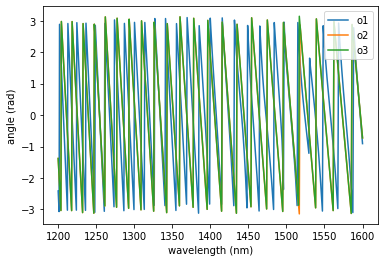

<AxesSubplot:xlabel='wavelength (nm)', ylabel='angle (rad)'>

In [8]:
m = gc.mmi1x2()
gs.plot_model(m, pin_in="o1", phase=True)

In [9]:
m.pins

In [10]:
pin = m.pins[0]

As you can see the MMI has -20dB reflection and -3dB transmission

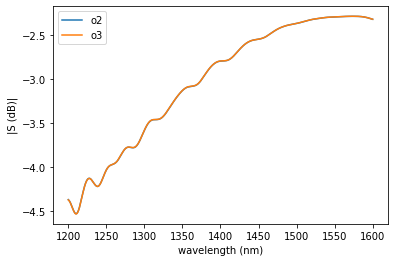

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [11]:
gs.plot_model(m, pins=('o2', "o3"))

2022-06-15 17:11:31.834 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi2x2_24e96fd6.dat


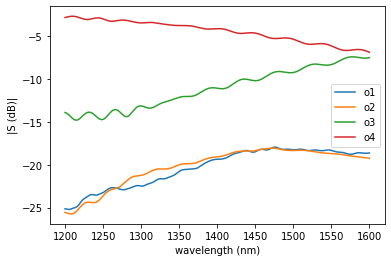

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [12]:
m = gc.mmi2x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m)

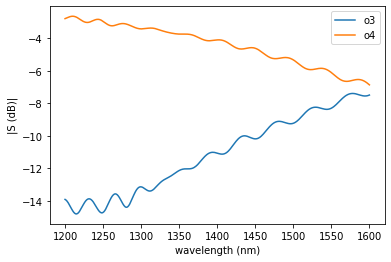

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [13]:
gs.plot_model(m, pins=('o3', "o4"))

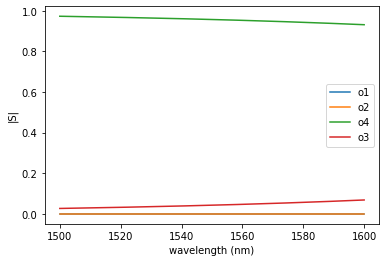

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [14]:
m = gc.coupler_ring()
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

In [15]:
gc.coupler_ring?

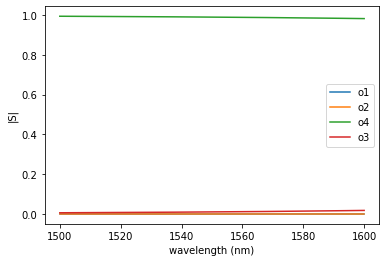

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [16]:
m = gc.coupler_ring(gap=0.3)
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

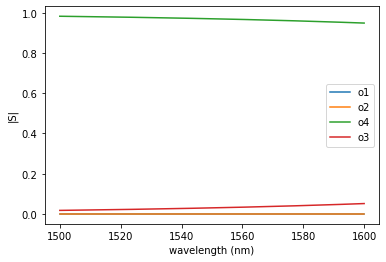

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [17]:
m = gc.coupler(gap=0.3)
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

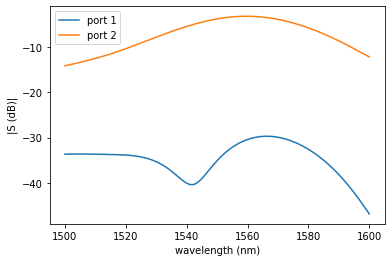

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [18]:
m = gc.gc1550te()
gs.plot_model(m, logscale=True, pin_in="port 1")

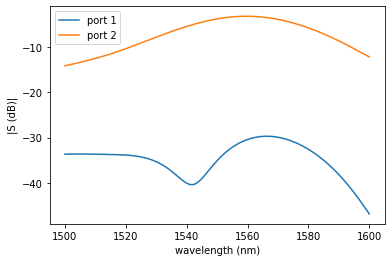

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [19]:
m = gc.gc1550te()
gs.plot_model(m, logscale=True, pin_in="port 1")

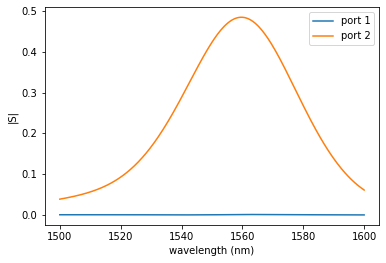

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [20]:
m = gc.gc1550te()
gs.plot_model(m, logscale=False, pin_in="port 1")

## Circuit simulations

With Simphony you can also combine components into circuits

### MZI interferometer

In [21]:
import matplotlib.pyplot as plt
import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc
import gdsfactory as gf

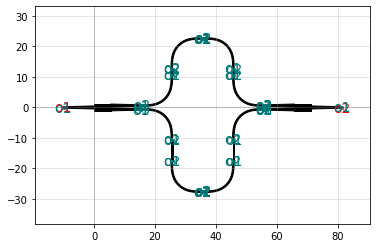

mzi: uid 2, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [22]:
c = gf.components.mzi(delta_length=10)
c

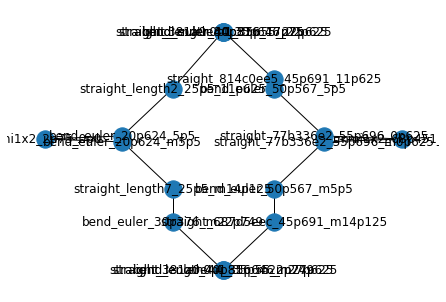

In [23]:
c.plot_netlist()

2022-06-15 17:11:33.425 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


2022-06-15 17:11:33.444 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


2022-06-15 17:11:33.461 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-06-15 17:11:33.463 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


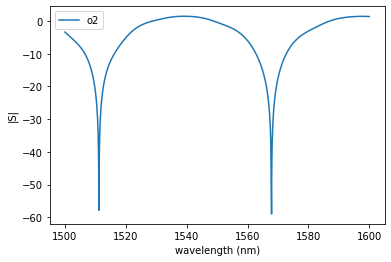

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [24]:
circuit = gs.components.mzi(delta_length=10, splitter=gs.components.mmi1x2)

gs.plot_circuit(
    circuit,
    start=1500e-9,
    stop=1600e-9,
    logscale=True,
)

2022-06-15 17:11:46.108 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


2022-06-15 17:11:46.126 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


2022-06-15 17:11:46.142 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-06-15 17:11:46.144 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


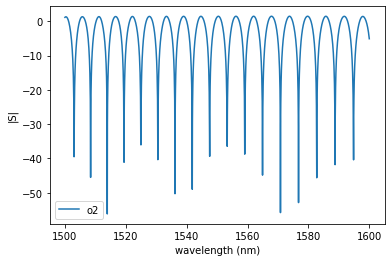

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [25]:
circuit = gs.components.mzi(delta_length=100, splitter=gs.components.mmi1x2)

gs.plot_circuit(
    circuit,
    start=1500e-9,
    stop=1600e-9,
    logscale=True,
)

Lets add grating couplers to the mzi circuit.

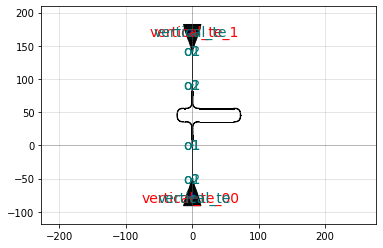

mzi_delta_length100_mov_8c3c4e2a: uid 28, ports ['vertical_te_00', 'vertical_te_1'], aliases [], 0 polygons, 5 references

In [26]:
mzi_layout = gf.components.mzi(delta_length=100)
mzi_with_gc_layout = gf.routing.add_fiber_single(
    component=mzi_layout, with_loopback=False
)
mzi_with_gc_layout

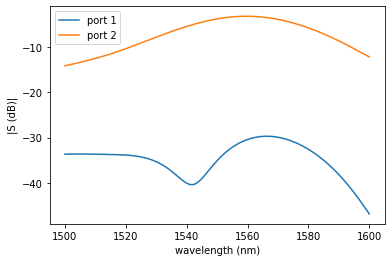

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [27]:
c = gc.gc1550te()
gs.plot_model(c, pin_in="port 1")

### MZI intereferometer from layout

In [28]:
import gdsfactory as gf
import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc
from simphony.libraries import siepic

c = gf.components.mzi(delta_length=10)
cm = gs.component_to_circuit(c)

2022-06-15 17:11:59.162 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


2022-06-15 17:11:59.180 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


2022-06-15 17:11:59.196 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:11:59.197 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:11:59.198 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:11:59.200 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:11:59.201 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:11:59.202 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:11:59.204 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-06-15 17:11:59.205 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-06-15 17:11:59.207 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-06-15 17:11:59.208 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


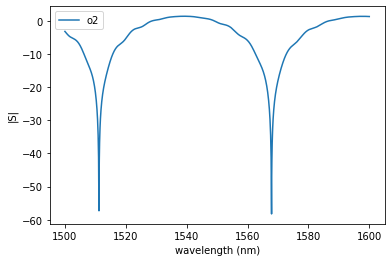

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [29]:
gs.plot_circuit(cm)

In [30]:
c = gf.components.mzi(delta_length=20) # Double the delta length should reduce FSR by half
cm = gs.component_to_circuit(c)

2022-06-15 17:12:22.299 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


2022-06-15 17:12:22.317 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:130 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_24e96fd6.dat


2022-06-15 17:12:22.334 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:12:22.335 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:12:22.336 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:12:22.337 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:12:22.338 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:12:22.340 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys(['cross_section'])


2022-06-15 17:12:22.342 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-06-15 17:12:22.342 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-06-15 17:12:22.343 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-06-15 17:12:22.345 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


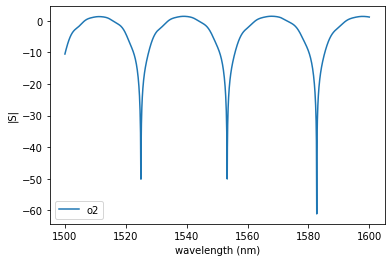

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [31]:
gs.plot_circuit(cm)

### Ring resonator


2022-06-15 17:12:44.716 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-06-15 17:12:44.719 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


/home/runner/work/gdsfactory/gdsfactory/gdsfactory/simulation/simphony/plot_circuit.py:54: RuntimeWarning: divide by zero encountered in log10
  y = 10 * np.log10(y) if logscale else y


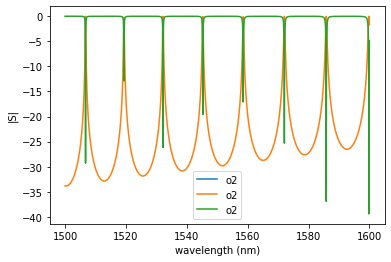

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [32]:
c = gc.ring_double(radius=5)
gs.plot_circuit(c, pins_out=["o2", "o3", "o4"])

2022-06-15 17:13:21.358 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


2022-06-15 17:13:21.361 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


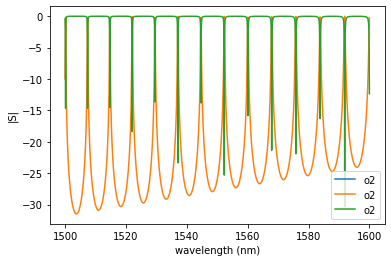

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S|'>

In [33]:
c = gs.components.ring_double(radius=10)
gs.plot_circuit(c, pins_out=["o2", "o3", "o4"])